# Estudio de mercado sobre restaurantes en L.A.

La idea es abrir un pequeño café regentado por robots en Los Ángeles, California. El proyecto es prometedor pero caro, por lo que es necesario intentar atraer inversionistas. Tenemos datos procedentes de fuentes abiertas sobre restaurantes en L.A.

Con estos datos realizaremos un estudio de mercado. Nos interesan las condiciones actuales del mercado, y intentaremos responder a la pregunta ¿seremos capaz de mantener el éxito de este restaurante cuando la novedad de los camareros robot desaparezca?

Dividiremos este proyecto en dos partes:

### **Análisis de datos**
Recibimos el archivo *rest_data_us.csv.csv* que contiene datos de distintos restaurantes en Los Ángeles. Prepararemos los datos para el ánalisis. Con los datos revisados, realizaremos lo siguiente:

- Investigaremos las proporciones de los distintos tipos de establecimientos.
- Investigaremos las proporciones de los establecimientos que pertenecen a una cadena y de los que no.
- Intentaremos responder a la siguiente pregunta: ¿Qué tipo de establecimiento es habitualmente una cadena?
- Intentaremos responder a la siguiente pregunta: ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?
- Determinaremos el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?
- Trazaremos un gráfico de las diez mejores calles por número de restaurantes.
- Encontraremos el número de calles que solo tienen un restaurante.
- Para las calles con muchos restaurantes, analizaremos la distribución del número de asientos. Buscaremos las tendencias observables.



### **Presentación de los datos**
Prepararemos una presentación de nuestra investigación para compartir con el grupo de inversionistas.

# Contenido <a id='back'></a>

* [1 Inicialización](#inicio)
    * [1.1 Cargar datos](#carga_datos)
    * [1.2 Explorar datos iniciales](#explorar_datos)
    * [1.3 Revisión de valores ausentes y/o duplicados](#nan_duplicados)
* [2 Análisis de datos](#data_analysis)
    * [2.1 Proporciones de los distintos tipos de establecimientos](#prop_rest)
    * [2.2 Proporciones de establecimientos que son o no cadenas](#prop_chain)
    * [2.3 ¿Qué tipo de establecimiento es habitualmente una cadena?](#whats_chain)
    * [2.4 ¿Qué caracteriza a las cadenas?](#seats_chain)
    * [2.5 ¿Qué tipo de restaurante tiene el mayor número de asientos?](#more_seats)
    * [2.6 Restaurantes por calle](#rest_streets)
* [3 Conclusión](#conclution)
* [4 Presentación](#presentation)

## Inicialización <a id='inicio'></a>

Con el fin de resolver nuestras dudas cargaremos las siguientes librerías:
- Pandas
- Matplotlib
- Seaborn

In [772]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

### Cargas de datos: <a id='carga_datos'></a>

Recibimos el siguiente archivos que vamos a obtimizar y luego cargaremos: *rest_data_us.csv*

In [773]:
rest_data = pd.read_csv(
    '/datasets/rest_data_us.csv',
    dtype={'object_type':'category'},
)

### Explorar datos iniciales <a id='explorar_datos'></a>

In [774]:
rest_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   object  
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


In [775]:
rest_data.columns = ['rest_id', 'rest_name', 'rest_address', 'chain', 'rest_type', 'n_chairs'] 

In [776]:
rest_data.head(5)

,rest_id,rest_name,rest_address,chain,rest_type,n_chairs
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [777]:
rest_data.tail(5)

,rest_id,rest_name,rest_address,chain,rest_type,n_chairs
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


El archivo *rest_data_us.csv* inicial pesaba 2.4 MB, se realizó una ligera obtimización. *object_type* pasó al tipo category. Con este cambio se logró reducir el peso a 1.8 MB. El archivo consta de 6 columnas y 9651 líneas. Se cambiaron los nombres de las columnas de *id*, *object_name*, *address*, *chain*, *object_type*, *number* a  'rest_id', 'rest_name', 'rest_address', 'chain', 'rest_type', 'n_chairs' respectivamente para hacerlos más específicos.

Finalmente, notamos que la columna 'chain' contiene 3 valores ausentes que tendremos que revisar.

### Revisión de valores ausentes y/o duplicados: <a id='nan_duplicados'></a>

Tenemos 3 restoranes que no sabemos si son de una cadena o no. Vamos a ver si estos 3 datos influyen en nuestro estudio de alguna manera, primero contaremos los valores que tenemos para comprender los datos mejor:

In [778]:
rest_data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

Luego podemos ver a que porcentaje de nuestro total corresponden los valores ausentes, para ver si vale la pena corregirlos:

In [779]:
nan_percentaje = rest_data['chain'].isna().sum() * 100 / rest_data['rest_id'].count()
print('Los valores ausentes en la columna chain corresponden al', nan_percentaje.round(2), 'porciento de los datos registrados.')

Los valores ausentes en la columna chain corresponden al 0.03 porciento de los datos registrados.


Revisaremos si los códigos de restoranes tienen duplicados:

In [780]:
print('La columna rest_id tiene', rest_data['rest_id'].duplicated().sum(), 'duplicados.')

La columna rest_id tiene 0 duplicados.


Revisaremos si la columna de direcciones tiene duplicados ya que no deberían haber dos locales en la misma dirrección y un nombre similar, pero tendremos que tener cuidado porque es posible que hayan varios locales en un centro comercial:

In [781]:
print('La columna rest_address tiene', rest_data['rest_address'].duplicated().sum(), 'duplicados.')

La columna rest_address tiene 1134 duplicados.


In [782]:
duplicate_address = rest_data['rest_address'].value_counts().reset_index()
duplicate_address.columns = ['address', 'n_duplicates']
duplicate_address.query('n_duplicates != 1')

,address,n_duplicates
0,3607 TROUSDALE PKWY,11
1,135 N GRAND AVE,10
2,600 WORLD WAY,9
3,400 WORLD WAY,9
4,5151 STATE UNIVERSITY DR,9
...,...,...
908,5101 W PICO BLVD,2
909,2027 SAWTELLE BLVD,2
910,11267 NATIONAL BLVD,2
911,1010 GLENDON AVE,2


De los 1134 duplicados, tenemos 913 dirrecciones duplicadas. Vamos a analizar esto un poco más a fondo.

Analizaremos los primeros 11 duplicados en la dirrección '3607 TROUSDALE PKWY':

In [783]:
rest_data.query('rest_address == "3607 TROUSDALE PKWY"').sort_values(by='rest_name')

,rest_id,rest_name,rest_address,chain,rest_type,n_chairs
888,12674,CALIFORNIA PIZZA KITCHEN,3607 TROUSDALE PKWY,True,Pizza,44
7756,19542,COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,True,Cafe,31
6311,18097,LEMONADE,3607 TROUSDALE PKWY,True,Restaurant,138
7698,19484,LEMONADES,3607 TROUSDALE PKWY,True,Restaurant,111
858,12644,MORETON FIGS RESTAURANT/BAR,3607 TROUSDALE PKWY,True,Bar,107
480,12266,PANDA EXPRESS,3607 TROUSDALE PKWY,False,Fast Food,40
2610,14396,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,True,Cafe,43
3268,15054,THE HABIT BURGER GRILL,3607 TROUSDALE PKWY,False,Fast Food,43
462,12248,TRADITIONS PUB,3607 TROUSDALE PKWY,False,Restaurant,197
457,12243,USC MAIN KITCHEN-BASEMENT,3607 TROUSDALE PKWY,True,Restaurant,227


Como se puede apreciar en esta tabla, nos encontramos con dos duplicados no obvios el primero corresponde a los índices 7756 y 2610 (COFFEE BEAN & TEA LEAF y THE COFFEE BEAN & TEA LEAF) que como se puede apreciar son duplicados, pero varían el número de sillas. Hay muchas razones que se podrían especular para esta diferencia en sillas, pero lo que haremos en estos casos es sacar el promedio y dejar solo una línea. Lo mismo con los índices 6311 y 7698 (LEMONADE y LEMONADES) claramente puede ser un simple error de tipeo. Se seguirá el mismo patrón. A continuación borraremos todos los índices que encontramos duplicados no obvios.

In [784]:
rest_data = rest_data.drop([
    5624,9444,5380,3317,9155,6701,7961,3337,6503,5194,2595,9274,9236,3920,9337,7586,4810,7108,9206,6483,6305,9181,7804,
    4234,2694,559,5850,7784,6198,3637,7821,8950,7721,8055,9640,6858,1984,9080,7692,8698,739,9159,6857,5168,6363,6739,211,
    8392,4984,2219,9360,444,794,9431,9331,9619,6662,4987,9534,9389,5004,6022,8563,8684,7113,8995,6076,5521,2995,8474,7159,
    6215,5352,9269,5641,8612,7309,7324,9537,7909,7063,5864,8969,7072,535,7227,9099,8611,6585,9553,3464,2003,7684,9247,6985,
    3479,3474,500,6638,3426,9497,3842,7131,5736,7695,7296,4409,3819,7698,2610,4077,4196,8328,9307,2236,3047,6386,9203,7095,
    6165,6406,5643,3341,6654,8579,8528,6255,1281,8618,9581,5607,5290,9031,7886,6494,2095,343,5637,8470,2766,5249,6538,9322,
    9305,4347,3773,7666,4062,8972,748,6213,7091,2909,9556,2590,7461,6747,5263,889,3897,4172,4208,2458,7104,3036,2239,6480,
    9177,5080,4514,9149,4536,6622,1580,6535,4483,7115,1581,6360,3384,7652,9051,8459,8547,3216,7826,6551,4364,6859,3163,8445,
    9067,6342,7933,9286,9062,9481,1494,3662,6440,254,1060,9042,7838,8861,8676,8771,4120,1195,6162,7454,6324,2124,9325,7642
],axis=0)

Encontramos 215 líneas que se eliminaron al ser considerados duplicados como explicado anteriormente. Las siguientes líneas corresponde a la correción de número de sillas ingresando los promedios de las líneas duplicadas:

In [785]:
rest_data.loc[1588,'n_chairs'] =190
rest_data.loc[9417,'n_chairs'] =82
rest_data.loc[6045,'n_chairs'] =139
rest_data.loc[714,'n_chairs'] =38
rest_data.loc[7435,'n_chairs'] =24
rest_data.loc[6792,'n_chairs'] =41
rest_data.loc[5626,'n_chairs'] =20
rest_data.loc[8286,'n_chairs'] =95
rest_data.loc[5164,'n_chairs'] =8
rest_data.loc[4998,'n_chairs'] =36
rest_data.loc[4464,'n_chairs'] =10
rest_data.loc[6257,'n_chairs'] =16
rest_data.loc[5148,'n_chairs'] =102
rest_data.loc[7508,'n_chairs'] =5
rest_data.loc[8540,'n_chairs'] =18
rest_data.loc[7839,'n_chairs'] =21
rest_data.loc[6522,'n_chairs'] =40
rest_data.loc[6435,'n_chairs'] =3
rest_data.loc[8006,'n_chairs'] =23
rest_data.loc[9101,'n_chairs'] =13
rest_data.loc[7432,'n_chairs'] =23
rest_data.loc[6485,'n_chairs'] =41
rest_data.loc[2963,'n_chairs'] =24
rest_data.loc[6800,'n_chairs'] =40
rest_data.loc[6383,'n_chairs'] =127
rest_data.loc[1147,'n_chairs'] =9
rest_data.loc[8305,'n_chairs'] =8
rest_data.loc[4255,'n_chairs'] =40
rest_data.loc[6878,'n_chairs'] =17
rest_data.loc[9153,'n_chairs'] =19
rest_data.loc[4639,'n_chairs'] =11
rest_data.loc[3215,'n_chairs'] =21
rest_data.loc[5656,'n_chairs'] =119
rest_data.loc[8499,'n_chairs'] =48
rest_data.loc[161,'n_chairs'] =123
rest_data.loc[6680,'n_chairs'] =23
rest_data.loc[7526,'n_chairs'] =74
rest_data.loc[9639,'n_chairs'] =137
rest_data.loc[610,'n_chairs'] =4
rest_data.loc[3148,'n_chairs'] =40
rest_data.loc[1562,'n_chairs'] =19
rest_data.loc[647,'n_chairs'] =124
rest_data.loc[9330,'n_chairs'] =112
rest_data.loc[6361,'n_chairs'] =41
rest_data.loc[9301,'n_chairs'] =113
rest_data.loc[8721,'n_chairs'] =43
rest_data.loc[2148,'n_chairs'] =105
rest_data.loc[6768,'n_chairs'] =13
rest_data.loc[871,'n_chairs'] =102
rest_data.loc[8916,'n_chairs'] =8
rest_data.loc[4577,'n_chairs'] =103
rest_data.loc[2085,'n_chairs'] =15
rest_data.loc[6892,'n_chairs'] =91
rest_data.loc[8797,'n_chairs'] =40
rest_data.loc[280,'n_chairs'] =40
rest_data.loc[5008,'n_chairs'] =20
rest_data.loc[5812,'n_chairs'] =18
rest_data.loc[7197,'n_chairs'] =35
rest_data.loc[6608,'n_chairs'] =102
rest_data.loc[7709,'n_chairs'] =142
rest_data.loc[7448,'n_chairs'] =118
rest_data.loc[9254,'n_chairs'] =39
rest_data.loc[6258,'n_chairs'] =35
rest_data.loc[7717,'n_chairs'] =18
rest_data.loc[6487,'n_chairs'] =42
rest_data.loc[7569,'n_chairs'] =12
rest_data.loc[2246,'n_chairs'] =39
rest_data.loc[7752,'n_chairs'] =8
rest_data.loc[1523,'n_chairs'] =102
rest_data.loc[5388,'n_chairs'] =181
rest_data.loc[8868,'n_chairs'] =21
rest_data.loc[8846,'n_chairs'] =18
rest_data.loc[7211,'n_chairs'] =4
rest_data.loc[6696,'n_chairs'] =41
rest_data.loc[6740,'n_chairs'] =37
rest_data.loc[5264,'n_chairs'] =190
rest_data.loc[9084,'n_chairs'] =40
rest_data.loc[7756,'n_chairs'] =37
rest_data.loc[6311,'n_chairs'] =125
rest_data.loc[6558,'n_chairs'] =136
rest_data.loc[6873,'n_chairs'] =19
rest_data.loc[9013,'n_chairs'] =40
rest_data.loc[7216,'n_chairs'] =13
rest_data.loc[8856,'n_chairs'] =119
rest_data.loc[7706,'n_chairs'] =13
rest_data.loc[9602,'n_chairs'] =21
rest_data.loc[1204,'n_chairs'] =187
rest_data.loc[6944,'n_chairs'] =20
rest_data.loc[4680,'n_chairs'] =45
rest_data.loc[8107,'n_chairs'] =117
rest_data.loc[6281,'n_chairs'] =48
rest_data.loc[5093,'n_chairs'] =33
rest_data.loc[8613,'n_chairs'] =102
rest_data.loc[9363,'n_chairs'] =21
rest_data.loc[5932,'n_chairs'] =108
rest_data.loc[7980,'n_chairs'] =11
rest_data.loc[7364,'n_chairs'] =27
rest_data.loc[1845,'n_chairs'] =105
rest_data.loc[7735,'n_chairs'] =24
rest_data.loc[8213,'n_chairs'] =17
rest_data.loc[7312,'n_chairs'] =20
rest_data.loc[8322,'n_chairs'] =128
rest_data.loc[5968,'n_chairs'] =111
rest_data.loc[2279,'n_chairs'] =35
rest_data.loc[7973,'n_chairs'] =34
rest_data.loc[7655,'n_chairs'] =21
rest_data.loc[4761,'n_chairs'] =111
rest_data.loc[1794,'n_chairs'] =39
rest_data.loc[8175,'n_chairs'] =28
rest_data.loc[8060,'n_chairs'] =25
rest_data.loc[5286,'n_chairs'] =35
rest_data.loc[7769,'n_chairs'] =43
rest_data.loc[5299,'n_chairs'] =14
rest_data.loc[7668,'n_chairs'] =43
rest_data.loc[6874,'n_chairs'] =12
rest_data.loc[959,'n_chairs'] =20
rest_data.loc[8395,'n_chairs'] =14
rest_data.loc[9546,'n_chairs'] =21
rest_data.loc[6580,'n_chairs'] =26
rest_data.loc[6907,'n_chairs'] =46
rest_data.loc[4009,'n_chairs'] =12
rest_data.loc[5067,'n_chairs'] =18
rest_data.loc[3019,'n_chairs'] =14
rest_data.loc[6582,'n_chairs'] =17
rest_data.loc[7012,'n_chairs'] =11
rest_data.loc[7010,'n_chairs'] =17
rest_data.loc[7366,'n_chairs'] =39
rest_data.loc[6824,'n_chairs'] =43
rest_data.loc[918,'n_chairs'] =5
rest_data.loc[6102,'n_chairs'] =101
rest_data.loc[2235,'n_chairs'] =52
rest_data.loc[648,'n_chairs'] =15
rest_data.loc[6317,'n_chairs'] =33
rest_data.loc[2948,'n_chairs'] =12
rest_data.loc[7436,'n_chairs'] =14
rest_data.loc[8076,'n_chairs'] =13
rest_data.loc[7616,'n_chairs'] =173
rest_data.loc[9300,'n_chairs'] =19
rest_data.loc[4366,'n_chairs'] =11
rest_data.loc[7142,'n_chairs'] =36
rest_data.loc[2795,'n_chairs'] =35
rest_data.loc[73,'n_chairs'] =24
rest_data.loc[5680,'n_chairs'] =40
rest_data.loc[1042,'n_chairs'] =46
rest_data.loc[7004,'n_chairs'] =11
rest_data.loc[9244,'n_chairs'] =12
rest_data.loc[7201,'n_chairs'] =10
rest_data.loc[7792,'n_chairs'] =41
rest_data.loc[8711,'n_chairs'] =37
rest_data.loc[7503,'n_chairs'] =113
rest_data.loc[8593,'n_chairs'] =15
rest_data.loc[6852,'n_chairs'] =16
rest_data.loc[7388,'n_chairs'] =169
rest_data.loc[4003,'n_chairs'] =20
rest_data.loc[8256,'n_chairs'] =119
rest_data.loc[8170,'n_chairs'] =25
rest_data.loc[8498,'n_chairs'] =13
rest_data.loc[7711,'n_chairs'] =12
rest_data.loc[9517,'n_chairs'] =19
rest_data.loc[9158,'n_chairs'] =4
rest_data.loc[8136,'n_chairs'] =36
rest_data.loc[6720,'n_chairs'] =45
rest_data.loc[7152,'n_chairs'] =8
rest_data.loc[8062,'n_chairs'] =40
rest_data.loc[5406,'n_chairs'] =12
rest_data.loc[6839,'n_chairs'] =44
rest_data.loc[7449,'n_chairs'] =26
rest_data.loc[3890,'n_chairs'] =46
rest_data.loc[3542,'n_chairs'] =109
rest_data.loc[8054,'n_chairs'] =17
rest_data.loc[4824,'n_chairs'] =101
rest_data.loc[7082,'n_chairs'] =18
rest_data.loc[7294,'n_chairs'] =13
rest_data.loc[2589,'n_chairs'] =12
rest_data.loc[2308,'n_chairs'] =34
rest_data.loc[1854,'n_chairs'] =82
rest_data.loc[7736,'n_chairs'] =160
rest_data.loc[7416,'n_chairs'] =6
rest_data.loc[733,'n_chairs'] =105
rest_data.loc[5733,'n_chairs'] =15
rest_data.loc[7014,'n_chairs'] =15
rest_data.loc[6712,'n_chairs'] =113
rest_data.loc[9340,'n_chairs'] =5
rest_data.loc[8353,'n_chairs'] =8

Se cambiaron 179 números de sillas que corresponden a los promedios de los duplicados. Nos quedan 20 líneas en las que el promedio podría perjudicar más que aportar a nuestro estudio. Estos son casos en los que el duplicado tenía números de sillas demasiados extremos y no justificables. Por ejemplo, PANDA GARDEN (8800 y 6198) uno tiene 44 sillas el otro 3, no podemos realmente saber si hay dos locales en la misma calle con un nombre tan similar (esto es más bien raro), no sabemos, si será un local de dos ambientes uno más pequño que el otro. Como nos faltan datos, es mejor dejarlo con un valor ausente. Tenmos un caso similar con NANAY GLORIA RESTAURANT Y BAKESHOP (8612 y 8114) por un lado tiene 3 sillas y por otro 41. Como ambas líneas corresponden a restaurantes, el promedio podría sesgar el estudio. Estos 16 duplicados los dejaremos como valores nulos:

In [786]:
rest_data.loc[7884,'n_chairs'] =np.NaN
rest_data.loc[7390,'n_chairs'] =np.NaN
rest_data.loc[3348,'n_chairs'] =np.NaN
rest_data.loc[9380,'n_chairs'] =np.NaN
rest_data.loc[9092,'n_chairs'] =np.NaN
rest_data.loc[8800,'n_chairs'] =np.NaN
rest_data.loc[802,'n_chairs'] =np.NaN
rest_data.loc[6233,'n_chairs'] =np.NaN
rest_data.loc[890,'n_chairs'] =np.NaN
rest_data.loc[8127,'n_chairs'] =np.NaN
rest_data.loc[8114,'n_chairs'] =np.NaN
rest_data.loc[3561,'n_chairs'] =np.NaN
rest_data.loc[8311,'n_chairs'] =np.NaN
rest_data.loc[3766,'n_chairs'] =np.NaN
rest_data.loc[5186,'n_chairs'] =np.NaN
rest_data.loc[6061,'n_chairs'] =np.NaN

Existen 6 duplicados que se eliminó una línea y no se hizo nada a la restante ya que los valores de sillas eran identicos o el promedio era igual al valor de la que quedó. Estos duplicados no necesariamente son duplicados identicos ya que tenían ligeras variaciones como por ejemplo (MR BOBA y MR. BOBA). El listado es:
- YOGURT LAND (índice 7341 - 6483)
- WINCHELL'S DONUT #9381 (índice 8302 - 8995)
- VEGAN HOUSE (índice 7280 - 5864)
- MR BOBA (índice 6012 - 2236)
- THE SPICY CHICKEN (índice 3910 - 5290)
- DRAGON LOCO (índice 6206 - 3317)

Se revisaron las siguientes direcciones, pero no registraron duplicados obvios:

"100 WORLD WAY,	1000 GAYLEY AVE,	1000 VIN SCULLY AVE,	1000 WILSHIRE BLVD,	10004 NATIONAL BLVD,	1001 WILSHIRE BLVD,	10024 S FIGUEROA ST,	1008 S ST ANDREWS PL,	1010 GLENDON AVE,	10101 WILSHIRE BLVD,	1019 S SANTA FE AVE,	1020 S FIGUEROA ST,	10201 W PICO BLVD,	10203 S CENTRAL AVE,	1025 N STATE ST,	1025 S FAIRFAX AVE,	1025 W 34TH ST,	10250 SANTA MONICA BLVD,	10309 W OLYMPIC BLVD,	1032 S WESTERN AVE,	1040 S WESTERN AVE,	10422 NATIONAL BLVD,	10460 W PICO BLVD,	1050 S HILL ST,	10543 W PICO BLVD,	1055 BROXTON AVE,	1061 BROXTON AVE,	1061 S HILL ST,	10628 S SAN PEDRO ST,	107 E 6TH ST,	1070 WILSHIRE BLVD,	10717 VENICE BLVD,	10727 S CENTRAL AVE,	108 W 2ND ST,	10800 W PICO BLVD # 324,	10821 VENICE BLVD,	10823 VENICE BLVD,	10833 LE CONTE AVE,	10913 W PICO BLVD,	10915 W PICO BLVD,	10924 W PICO BLVD,	10948 WEYBURN AVE,	10967 WEYBURN AVE,	10990 WILSHIRE BLVD STE 180,	1101 GAYLEY AVE,	11022 AVIATION BLVD,	1105 S LA BREA AVE,	111 S GRAND AVE,	111 S GRAND AVE # #950,	111 S SAN PEDRO ST,	11102 W OLYMPIC BLVD,	11110 W OLYMPIC BLVD,	11127 VENICE BLVD,	11267 NATIONAL BLVD,	11270 LA GRANGE AVE,	11301 W OLYMPIC BLVD,	11301 W OLYMPIC BLVD # 106,	11301 W OLYMPIC BLVD STE 204,	11313 MISSISSIPPI AVE,	1145 N MISSION RD,	1145 S WESTERN AVE,	11461 W SUNSET BLVD,	1147 S WESTERN AVE,	1149 N GOWER ST,	1150 S BEVERLY DR,	1156 N HIGHLAND AVE,	11668 W PICO BLVD,	11677 SAN VICENTE BLVD,	11678 SAN VICENTE BLVD,	11711 NATIONAL BLVD,	11712 SAN VICENTE BLVD,	11753 SAN VICENTE BLVD,	11916 S FIGUEROA ST,	11916 WILSHIRE BLVD,	11925 SANTA MONICA BLVD,	120 S LOS ANGELES ST,	1200 GETTY CENTER DR,	121 N LARCHMONT BLVD,	12121 WILSHIRE BLVD # 110,	1220 W 7TH ST,	1225 W VENICE BLVD,	123 ASTRONAUT E S ONIZUKA ST STE 203,	123 ASTRONAUT E. S. ONIZUKA ST,	123 N LARCHMONT BLVD,	12326 1/2 VENICE BLVD,	124 N WESTERN AVE,	1240 S MAIN ST STE 404,	1242 E FLORENCE AVE,	1248 S FIGUEROA ST,	125 W 5TH ST,	1253 N VINE ST # 12,	1253 VINE ST # 1,	12746 W JEFFERSON BLVD,	1275 S BRONSON AVE,	1277 W JEFFERSON BLVD,	129 N LA BREA AVE,	130 E 6TH ST,	130 W BRUNO ST,	1308 N EDGEMONT ST,	1321 WESTWOOD BLVD,	133 N SUNOL DR,	1330 E IMPERIAL HWY,	1341 E FLORENCE AVE,	135 N GRAND AVE,	1356 ALLISON AVE,	1375 W ADAMS BLVD,	1378 W SUNSET BLVD,	1400 W pico BLVD,	1403 HOOPER AVE,	1403 W 11TH ST,	1412 S LORENA ST,	143 N LA BREA AVE,	1435 N HIGHLAND AVE,	1436 S VERMONT AVE,	1443 W 11TH ST,	1457 E FLORENCE AVE # 113,	1501 FIRESTONE BLVD,	1501 N VINE ST,	1511 N CAHUENGA BLVD,	1520 W 7TH ST,	1523 GRIFFITH PARK BLVD,	1523 S BUNDY DR,	1549 N VERMONT AVE,	1552 N CAHUENGA BLVD,	1556 N CAHUENGA BLVD,	1603 N CAHUENGA BLVD,	1625 E CESAR E CHAVEZ AVE,	1634 N CAHUENGA BLVD,	1643 N CAHUENGA BLVD,	1651 1/2 N LA BREA AVE,	1682 E VERNON AVE,	1704 N EASTERN AVE,	1720 S SOTO ST,	1733 COLORADO BLVD,	1735 W 6TH ST,	1742 S LA CIENEGA BLVD,	1743 COLORADO BLVD,	1754 W SLAUSON AVE,	1755 N HIGHLAND AVE,	180 S LA BREA AVE,	1801 COLORADO BLVD,	1811 W 7TH ST,	1820 N LAS PALMAS AVE,	1822 W SUNSET BLVD,	1830 W 8TH ST,	1843 1/2 E 1ST ST,	189 THE GROVE DR,	1901 8TH AVE,	1901 S ALAMEDA ST STE 115,	1903 HYPERION AVE,	1903 S MAPLE AVE,	1913 E GAGE AVE,	1917 S VERMONT AVE,	1924 W OLYMPIC BLVD,	1930 W OLYMPIC BLVD,	1958 COLORADO BLVD,	199 W OLYMPIC BLVD,	1999 N SYCAMORE AVE,	2000 E 7TH ST,	2025 AVENUE OF THE STARS,	2027 SAWTELLE BLVD,	203 N WESTERN AVE,	2030 S SAWTELLE BLVD,	2040 HILLHURST AVE,	205 S VERMONT AVE,	208 E 8TH ST,	209 S VERMONT AVE,	210 E OLYMPIC BLVD STE 127,	2100 ECHO PARK AVE,	2114 COLORADO BLVD,	2117 SAWTELLE BLVD,	2119 SAWTELLE BLVD,	2124 S CENTRAL AVE,	2134 W SUNSET BLVD,	2152 COLORADO BLVD,	2157 W CENTURY BLVD,	2166 W SLAUSON AVE,	2201 S SAN PEDRO ST,	2201 W PICO BLVD STE A,	2202 W SUNSET BLVD,	2215 S CENTRAL AVE,	2215 WESTWOOD BLVD,	222 W SLAUSON AVE,	2222 SAWTELLE BLVD,	2223 N BROADWAY,	2224 SAWTELLE BLVD,	223 W 6TH ST,	225 W 7TH ST,	2256 COLORADO BLVD,	229 E 9TH ST,	230 N LARCHMONT BLVD,	2300 VENICE BLVD,	231 N AVENUE 50,	2312 1/2 W 48TH ST,	2321 E 1ST ST,	2321 S HOOVER ST,	2331 E 4TH ST,	2379 WESTWOOD BLVD,	238 E 1ST ST,	2400 W 7TH ST # 101,	241 W ADAMS BLVD,	2423 DALY ST,	2424 S SAN PEDRO ST,	2454 W PICO BLVD,	2500 W 8TH ST # 108,	251 S OLIVE ST,	252 E MARTIN LUTHER KING JR BLVD,	2520 GLENDALE BLVD,	2536 OVERLAND AVE,	254 W FLORENCE AVE,	2585 W OLYMPIC BLVD,	260 S LA BREA AVE,	2600 S VERMONT AVE,	2600 W 6TH ST,	2619 W SUNSET BLVD,	2622 N FIGUEROA ST,	2635 E 4TH ST,	2635 WHITTIER BLVD,	2700 COLORADO BLVD,	2700 N VERMONT AVE,	2701 N SEPULVEDA BLVD,	2716 N SAN FERNANDO RD,	2734 N EASTERN AVE,	2740 W OLYMPIC BLVD,	2765 E OLYMPIC BLVD,	2803 S FIGUEROA ST,	2807 S FIGUEROA ST,	2835 S ROBERTSON BLVD,	2851 CRENSHAW BLVD,	2903 W SUNSET BLVD,	2904 S FIGUEROA ST,	2930 BEVERLY BLVD,	300 W FLORENCE AVE,	300 WORLD WAY,	301 S WESTERN AVE STE #201,	3010 E 1ST ST,	3019 S FIGUEROA ST,	3054 W 8TH ST UNIT 101-3,	3063 W 8TH ST,	3068 W 8TH ST,	3076 W 8TH ST,	3077 W 8TH ST,	308 WESTWOOD PLZ,	3084 MOTOR AVE,	310 E FLORENCE AVE,	3100 N EASTERN AVE,	3106 N EASTERN AVE,	3118 S SEPULVEDA BLVD,	3120 S SEPULVEDA BLVD,	3122 W 8TH ST,	3125 N SAN FERNANDO RD,	313 E 1ST ST,	3132 W OLYMPIC BLVD,	3134 GLENDALE BLVD,	3160 W 8TH ST,	317 S BROADWAY STE #14,	318 E 2ND ST STE A,	3183 WILSHIRE BLVD STE 186,	3200 E 4TH ST,	3201 S HOOVER ST,	3219 GLENDALE BLVD,	3224 GLENDALE BLVD,	3250 W OLYMPIC BLVD STE 314,	3255 W 4TH ST,	3277 N SAN FERNANDO RD,	328 E 1ST ST,	330 S HOPE ST,	3300 W 6TH ST # 4,	3324 W 6TH ST # A,	333 S ALAMEDA ST # 100,	333 S FIGUEROA ST,	3345 N EASTERN AVE,	3377 WILSHIRE BLVD # 200,	3407 W 6TH ST UNIT 101B,	3410 W 3RD ST,	3411 W OLYMPIC BLVD,	3417 W 6TH ST,	3419 S SAN PEDRO ST,	3425 E 1ST ST STE 110,	3435 WILSHIRE BLVD STE 108,	3446 WILSHIRE BLVD,	3450 W 6TH ST # 107,	3456 WILSHIRE BLVD,	3470 W 6TH ST # 2B,	3470 W 6TH ST STE 2A,	349 N LA CIENEGA BLVD,	350 E 1ST ST,	3500 W 6TH ST,	3500 W 6TH ST # 222,	3500 W 6TH ST # 225,	3500 W 6TH ST STE 228,	3500 W SUNSET BLVD,	3500 WILSHIRE BLVD,	351 S BROADWAY,	3520 N FIGUEROA ST,	3525 W 3RD ST # 2,	3525 W 8TH ST,	3536 W SUNSET BLVD,	3540 E 1ST ST,	356 S WESTERN AVE # 203-4,	359 E 1ST ST,	3603 S SAN PEDRO ST,	3608 W 3RD ST,	3609 W PICO BLVD,	361 S WESTERN AVE # 101,	3617 S VERMONT AVE,	3619 W OLYMPIC BLVD,	3625 STOCKER ST,	3627 W PICO BLVD,	3650 W MLK BLVD,	3670 BROADWAY PL,	3680 WILSHIRE BLVD STE 201,	3702 MEDFORD ST,	3706 WHITTIER BLVD,	3717 E 1ST ST,	3719 W SUNSET BLVD,	3725 W SUNSET BLVD,	3726 W 6TH ST,	3760 S CENTINELA AVE,	3760 WILSHIRE BLVD,	3782 S FIGUEROA ST,	380 WORLD WAY,	3800 BARHAM BLVD # 106,	3804 BROADWAY PL,	3806 S WESTERN AVE,	3869 WILSHIRE BLVD,	3871 WILSHIRE BLVD,	3914 WHITTIER BLVD,	3929 W OLYMPIC BLVD,	3939 S FIGUEROA ST,	3959 WILSHIRE BLVD # B5,	3959 WILSHIRE BLVD STE B-1,	3960 WHITTIER BLVD,	3981 W 6TH ST,	3986 WILSHIRE BLVD,	400 WORLD WAY,	401 S HOPE ST,	4010 W 3RD ST,	4030 S CENTINELA AVE,	4031 W OLYMPIC BLVD,	404 S FIGUEROA ST STE 418A,	4103 BEVERLY BLVD,	412 N FAIRFAX AVE,	4134 CRENSHAW BLVD,	4161 BEVERLY BLVD,	418 1/2 N FAIRFAX AVE,	421 W 7TH ST,	4211 EAGLE ROCK BLVD,	4216 MELROSE AVE,	4251 W 3RD ST,	4281 BEVERLY BLVD,	429 E 11th ST,	431 W 7TH ST,	4317 W BEVERLY BLVD,	432 E 2ND ST,	4339 W SUNSET BLVD,	440 N LA CIENEGA BLVD,	4433 S ALAMEDA ST # B5,	4448 W SLAUSON AVE,	445 S FIGUEROA ST STE 100,	4451 BEVERLY BLVD,	4459 EAGLE ROCK BLVD,	4462 E OLYMPIC BLVD,	448 N FAIRFAX AVE,	448 S HILL ST,	4501 COLORADO BLVD,	4503 N FIGUEROA ST,	4518 HOLLYWOOD BLVD,	4520 W SUNSET BLVD,	4578 WHITTIER BLVD,	4601 W PICO BLVD,	4616 EAGLE ROCK BLVD,	4626 AVALON BLVD,	4626 W ADAMS BLVD,	4641 W WASHINGTON BLVD,	4648 HOLLYWOOD BLVD,	465 S LA CIENEGA BLVD,	4650 W SUNSET BLVD,	4729 E OLYMPIC BLVD,	4730 CRYSTAL SPRINGS DR,	474 N WESTERN AVE,	475 GIN LING WAY,	476 N WESTERN AVE,	4760 W PICO BLVD,	4770 E CESAR CHAVEZ AVE,	4801 HOOPER AVE,	4874 SANTA MONICA BLVD,	500 WORLD WAY,	5000 WHITTIER BLVD,	5003 MELROSE AVE,	5007 W PICO BLVD,	501 S SPRING ST,	5022 YORK BLVD,	5028 MELROSE AVE,	505 S FLOWER ST,	5065 HOLLYWOOD BLVD STE 102,	5080 RODEO RD,	5101 S FIGUEROA ST,	5101 W PICO BLVD,	5103 S FIGUEROA ST,	5116 S CENTRAL AVE,	5144 E BEVERLY BLVD,	5150 HOLLYWOOD BLVD,	5158 HOLLYWOOD BLVD,	516 S WESTERN AVE,	5161 POMONA BLVD STE 103,	5165 E WHITTIER BLVD,	517 E OLYMPIC BLVD,	517 S SPRING ST,	5173 W SUNSET BLVD,	518 W 7TH ST,	519 S FAIRFAX AVE,	5209 W SUNSET BLVD,	5216 W SUNSET BLVD,	5223 WILSHIRE BLVD,	523 W 6TH ST,	5234 VALLEY BLVD,	5245 W CENTINELA AVE,	525 S FLOWER ST,	5303 W PICO BLVD,	534 S OCCIDENTAL BLVD,	535 S GRAND AVE,	5373 W PICO BLVD,	538 S FLOWER ST,	539 S WESTERN AVE,	5400 W CENTURY BLVD,	541 S SPRING ST,	5420 HOLLYWOOD BLVD,	543 S WESTERN AVE,	5445 HOLLYWOOD BLVD STE A,	5450 W PICO BLVD # 101,	5455 N FIGUEROA ST,	5515 WILSHIRE BLVD,	5528 YORK BLVD,	5545 W PICO BLVD,	5547 SANTA MONICA BLVD,	555 W 5TH ST,	555 W TEMPLE ST,	5567 N FIGUEROA ST,	5601 WILSHIRE BLVD,	5615 HOLLYWOOD BLVD,	5616 E BEVERLY BLVD,	5633 YORK BLVD,	5656 W MANCHESTER AVE,	5677 W PICO BLVD,	5711 W CENTURY BLVD,	5750 MELROSE AVE,	5757 WILSHIRE BLVD STE 102,	5800 W WEST BLVD,	5801 N FIGUEROA ST,	5801 S VERMONT AVE,	5813 N FIGUEROA ST,	5820 MELROSE AVE,	5836 W MANCHESTER AVE,	5855 W CENTURY BLVD,	5900 S CENTRAL AVE,	5901 S NORMANDIE AVE,	5905 WILSHIRE BLVD,	5907 HOLLYWOOD BLVD,	5930 FRANKLIN AVE,	5985 CENTURY BLVD,	5985 W CENTURY BLVD,	6001 S HOOPER AVE,	6007 E OLYMPIC BLVD,	6009 W 3RD ST,	601 W 5TH ST,	6015 W 3RD ST,	6021 HOLLYWOOD BLVD,	6022 AVION DR,	6031 SAN VICENTE BLVD,	607 S UNION AVE,	608 E 59TH ST,	6095 W SUNSET BLVD,	6104 W SUNSET BLVD,	611 EXPOSITION BLVD,	611 N VIRGIL AVE,	612 S FLOWER ST,	620 S HARVARD BLVD,	6201 HOLLYWOOD BLVD,	6201 HOLLYWOOD BLVD # 118,	6225 S SAN PEDRO ST,	6250 HOLLYWOOD BLVD,	6250 W HOLLYWOOD BLVD,	626 S SPRING ST STE B,	6300 YORK BLVD,	632 S HILL ST,	633 S SPRING ST,	633 W 5TH ST,	6333 W 3RD ST,	6333 W 3RD ST # EK10,	6333 W 3RD ST STE 330,	6333 W 3RD ST STE# 175-E,	6360 W SUNSET BLVD,	639 E EL SEGUNDO BLVD,	646 S MAIN ST,	649 E MANCHESTER AVE,	6500 SELMA AVE,	6511 HOLLYWOOD BLVD,	6520 CRENSHAW BLVD,	654 E GAGE AVE,	6541 HOLLYWOOD BLVD STE 101,	6545 SANTA MONICA BLVD,	655 S HOPE ST,	6603 HOLLYWOOD BLVD,	6613 HOLLYWOOD BLVD,	670 S WESTERN AVE,	6705 SANTA MONICA BLVD,	6707 S BROADWAY,	672 S LA BREA AVE,	6751 SANTA MONICA BLVD,	6785 SANTA MONICA BLVD,	6801 HOLLYWOOD BLVD,	6801 HOLLYWOOD BLVD # 419,	6801 HOLLYWOOD BLVD STE 325,	681 S WESTERN AVE,	686 N SPRING ST,	6909 MELROSE AVE,	6913 LA TIJERA BLVD,	692 S ALVARADO ST,	6925 HOLLYWOOD BLVD,	698 S VERMONT AVE # 106,	698 S VERMONT AVE STE 103,	698 S VERMONT AVE STE 111,	700 W 7TH ST,	700 WILSHIRE BLVD,	700 WORLD WAY,	7000 HOLLYWOOD BLVD,	7001 S CENTRAL AVE,	701 S ATLANTIC BLVD,	701 S VERMONT AVE,	701 STONE CANYON RD,	703 S VERMONT AVE,	710 N HELIOTROPE DR,	710 S ALVARADO ST,	7122 BEVERLY BLVD # C,	7131 W SUNSET BLVD # B,	7168 MELROSE AVE,	7170 BEVERLY BLVD,	7180 W SUNSET BLVD,	7217 MELROSE AVE,	7257 W SUNSET BLVD,	727 N BROADWAY # 120,	727 N BROADWAY STE 130,	727 N VINE ST,	727 S ALVARADO ST,	7274 MELROSE AVE,	7300 W SUNSET BLVD STE H,	7311 N FIGUEROA ST,	7311 W SUNSET BLVD,	735 E 12TH ST # 406,	7356 MELROSE AVE,	7363 W SUNSET BLVD,	7368 MELROSE AVE,	7407 1/2 MELROSE AVE,	741 S SOTO ST,	742 N HIGHLAND AVE,	7455 MELROSE AVE,	7473 MELROSE AVE,	7475 BEVERLY BLVD,	7509 W SUNSET BLVD,	751 ECHO PARK AVE,	751 N VIRGIL AVE,	752 S VERMONT AVE,	754 S VERMONT AVE,	755 N VIRGIL AVE,	7563 BEVERLY BLVD,	759 S LA BREA AVE,	764 S WESTERN AVE,	7651 S SAN PEDRO ST,	7669 BEVERLY BLVD,	7717 COMPTON AVE,	7717 S WESTERN AVE,	7751 1/2 MELROSE AVE,	7800 BEVERLY BLVD,	7825 S BROADWAY,	7980 SUNSET BLVD,	800 W OLYMPIC BLVD,	800 W OLYMPIC BLVD STE A335,	8001 S CENTRAL AVE,	8010 MELROSE AVE,	8022 3RD ST,	8025 AVALON BLVD,	8029 W SUNSET BLVD,	8048 W 3RD ST,	8054 W 3RD ST,	807 E 12TH ST STE 249,	807 S ARDMORE AVE,	808 S WESTERN AVE # 207,	808 W 7TH ST,	8116 BEVERLY BLVD,	8120 AVALON BLVD,	815 W 7TH ST,	816 S GRAND AVE,	8180 MELROSE AVE,	819 S FLOWER ST,	826 E 3RD ST,	8300 MELROSE AVE,	832 JAMES M WOOD BLVD,	8360 MELROSE AVE,	838 S GRAND AVE,	8385 BEVERLY BLVD,	8424 BEVERLY BLVD,	843 N BROADWAY,	843 S LOS ANGELES ST,	8451 S VERMONT AVE,	850 S LA BREA AVE,	8500 W OLYMPIC BLVD STE B,	8509 S FIGUEROA ST,	8511 S BROADWAY,	855 N VERMONT AVE,	8556 W 3RD ST,	859 S WESTERN AVE,	8639 LINCOLN BLVD,	8647 W PICO BLVD,	8657 W PICO BLVD,	8700 BEVERLY BLVD,	8701 LINCOLN BLVD,	8744 W 3RD ST,	8771 W PICO BLVD,	8823 W PICO BLVD,	8832 W PICO BLVD,	8975 W PICO BLVD,	8985 VENICE BLVD,	900 W OLYMPIC BLVD,	901 W OLYMPIC BLVD,	923 FOREST AVE,	928 S WESTERN AVE # 123,	929 W JEFFERSON BLVD,	935 BROXTON AVE,	936 S VERMONT AVE,	944 W FLORENCE AVE,	949 S FIGUEROA ST,	9575 W PICO BLVD,	960 N HILL ST,	9616 W PICO BLVD,	970 N WESTERN AVE,	9750 AIRPORT BLVD,	980 S SAN PEDRO ST,	9801 AIRPORT BLVD,	984 S WESTERN AVE,	9901 S LA CIENEGA BLVD,"

### Justificación para estos datos eliminados del dataframe:

Se revisaron línea a línea las dirrecciones que contenian más de un restaurante. Se analizó si era justificable que hubiesen varios restaurantes en aquella dirrección, por ejemplo si es un boulevar, un centro comerciall, cacino o incluso campus universitario, tiene sentido que hayan varios restaurantes e incluso que se repitan por ejemplo cadenas de café. 

Por otro lado, se consideraron datos inciertos los restauranes que tenían casi el mismo nombre con ligeras variaciones en la misma calle, por ejemplo *GET BBUL* y *GETBBUL RESTAURANT* es muy probable que sean el mismo restaurante sobre todo porque la dirrección es bastante espécifica *3189 1/2 W OLYMPIC BLVD*. Otro ejemplo, *Pollos al carbon restaurant* y *Restaurant Pollo al carbón*, los dos en *326 E PICO BLVD*, lo más probable es que haya sido ingresado dos veces. 

Otro punto a considerar es cuando los números de sillas no son exactamente iguales. Cuando son iguales es simple, se dejó un registro (lamentablemente solo encontramos 6 de estos casos). En la gran mayoría de los casos, el número de sillas no eran iguales, en los casos en que la diferencia era muy poca o se podía justificar se sacó un promedio para dejar un registro, en los casos en que las diferencias eran muy grandes y no había forma de justificar un promedio se dejó como valor ausente.

Si bien, se podría considerar antojadiso el método utilizado ya que no podemos asegurar al 100% que los datos borrados efectivamente son duplicados (a menos que salgamos a terreno), podemos confirmar que los datos que quedaron en el dataset están 100% válidados, de manera manual y revisando diferentes variables tales como si los nombres eran similares o no (ya sea por traducción de nombres o mala orthografía y/o simbolos extraños), si la categoría era la misma o no y si resultaba cohorente que lo fuese (por ejemplo en el casino es normal tener un café en el primer piso y un restaurante en el último), se analizó la posibilidad de que hubiesen más de un restaurante en la misma calle (un carrito de tacos en Sunset Boulevard hace sentido que cada x metros se pueda poner otro, sobre todo si el número de sillas no es muy grande, en cambio dos JACK IN THE BOX # 370 en la misma calle es mucho menos probable), con todo este labor realizado estamos seguros de que los resultados que obtengamos serán más cercanos a la realidad que si no se hubiesen realizado estos cambios.

## Análisis de datos <a id='data_analysis'></a>

En esta sección intentaremos responder nuestras preguntas iniciales con el fin de sacar conclusiones relevantes para nuestra presentación. Utilizaremos la siguiente paleta de colores:

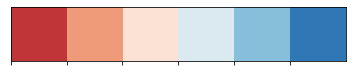

In [787]:
palette = sns.color_palette("RdBu", 6)
sns.palplot(palette)

### Proporciones de los distintos tipos de establecimientos: <a id='prop_rest'></a>

Para ver las proporciones de los distintos tipos de establecimientos, primero contaremos cuantos establecimientos hay por tipo, luego trazaremos un gráfico para visualizar estos datos mejor.

In [788]:
rest_data['rest_type'].value_counts(normalize=True)

Restaurant    0.752120
Fast Food     0.110004
Cafe          0.044616
Pizza         0.032641
Bar           0.030839
Bakery        0.029780
Name: rest_type, dtype: float64

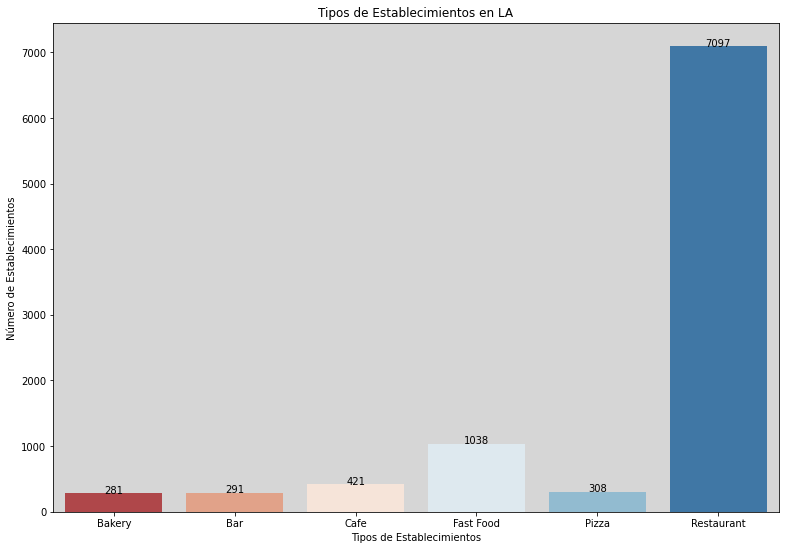

In [789]:
dif_types = rest_data.groupby(by=['rest_type']).count().reset_index()
plt.figure(figsize=(13,9))
sns.set_palette(palette)
ax = sns.barplot(x='rest_type', y='rest_id', data=dif_types, errwidth=0)
plt.xlabel("Tipos de Establecimientos")
plt.ylabel("Número de Establecimientos")
plt.title("Tipos de Establecimientos en LA")
for index, row in dif_types.iterrows():
    ax.text(row.name, row.chain, round(row.rest_id, 2),
            color='black', ha='center')
plt.show()

Como se puede apreciar la mayoría de los establecimientos corresponden a restoranes (7097), son seguidos muy por debajo por los establecimientos de comida rápida (1038). El resto son números muy por debajo de los 500 establecimientos.

### Proporciones de establecimientos que son o no cadenas: <a id='prop_chain'></a>

Para revisar esta proporción vamos a mostrar un nuevo gráfico:

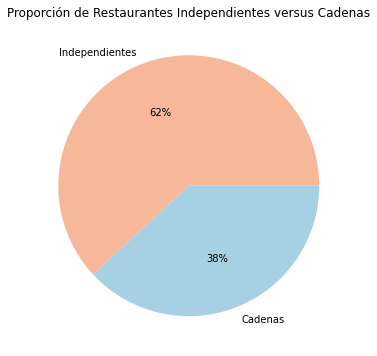

In [790]:
palette_2 = sns.color_palette("RdBu", 2)
data = [5972, 3676]
labels = ['Independientes', 'Cadenas']
plt.figure(figsize=(12,6))
plt.title("Proporción de Restaurantes Independientes versus Cadenas")
plt.pie(data, labels = labels, colors = palette_2, autopct='%.0f%%')
plt.show()

Podemos notar que el 62% de los establecimiontos en LA corresponden a locales independientes. ¿Podría ser que la gente prefiera locales más autenticos que cadenas en Los Ángeles?

### ¿Qué tipo de establecimiento es habitualmente una cadena? <a id='whats_chain'></a>

In [791]:
rest_data.query('chain == True')['rest_type'].value_counts(normalize=True)

Restaurant    0.621629
Fast Food     0.165169
Bakery        0.078933
Cafe          0.071910
Pizza         0.040730
Bar           0.021629
Name: rest_type, dtype: float64

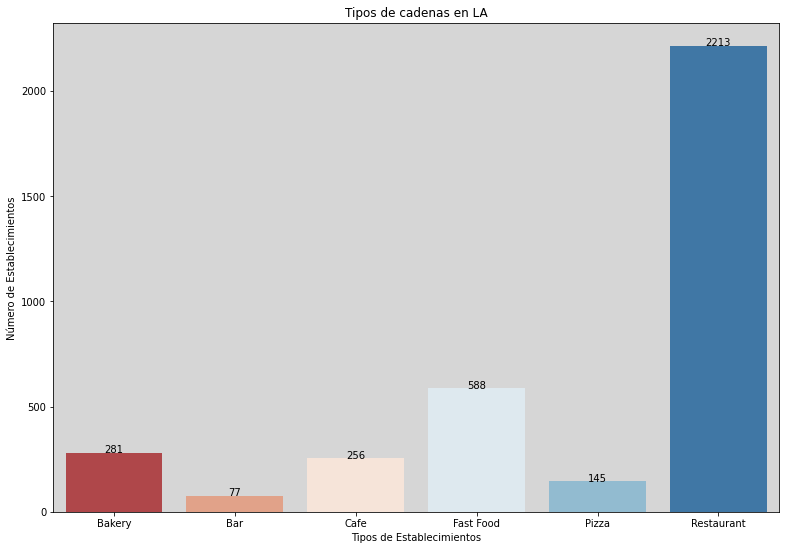

In [792]:
chains = rest_data.query('chain == True')
chains_types = chains.groupby(by=['rest_type']).count().reset_index()
plt.figure(figsize=(13,9))
ax = sns.barplot(x='rest_type', y='rest_id', data=chains_types, errwidth=0)
plt.xlabel("Tipos de Establecimientos")
plt.ylabel("Número de Establecimientos")
plt.title("Tipos de cadenas en LA")
for index, row in chains_types.iterrows():
    ax.text(row.name, row.chain, round(row.rest_id, 2),
            color='black', ha='center')
plt.show()

Las cadenas siguen el mismo patrón, la mayoría de las cadenas corresponden a restoranes (2213), son seguidos muy por debajo por las cadenas de comida rápida (588). El resto son números por debajo de los 300.

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos? <a id='seats_chain'></a>

Para responder a esta pregunta primero haremos una mirada general de los datos:

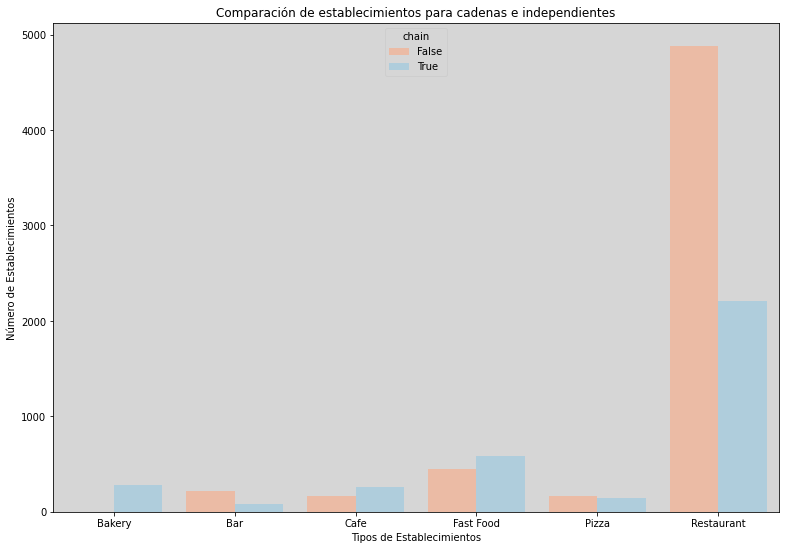

In [827]:
plt.figure(figsize=(13,9))
palette_2 = sns.color_palette("RdBu", 2)
sns.set_palette(palette_2)
sns.countplot(data=rest_data, x='rest_type', hue='chain')
plt.xlabel("Tipos de Establecimientos")
plt.ylabel("Número de Establecimientos")
plt.title("Comparación de establecimientos para cadenas e independientes")
plt.show()

Como se puede apreciar, acá encontramos algunos datos interesantes. Por ejemplo, las panaderías son todas cadenas (en nuestra base de datos no tenemos ninguna independiente). Los bares, en cambio, al menos en Los Ángeles tienden a ser locales independientes. Los cafés y los locales de comida rápida tienden a ser cadenas, mientras que las pizerias se encuentran bastante parejas. En lo que a restaurantes compete, hay más restaurantes independientes que cadenas. Vamos a analizar como se comporta el número de sillas para las cadenas:

In [794]:
chains['n_chairs'].describe()

count    3553.000000
mean       39.559809
std        43.302595
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: n_chairs, dtype: float64

Podemos visualizar la distribución de sillas con el siguiente gráfico:

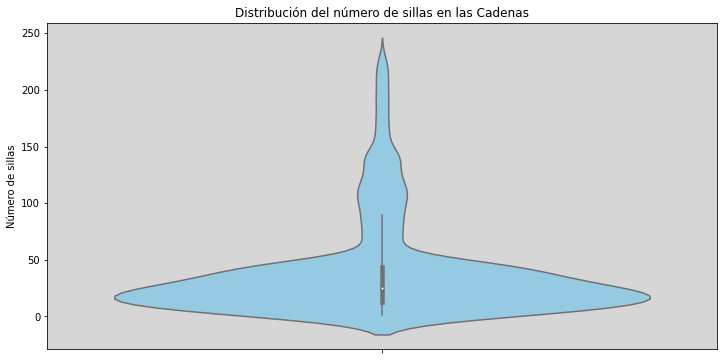

In [795]:
plt.figure(figsize=(12,6))
sns.violinplot(y='n_chairs', data=chains, color="#89CFF0")
plt.ylabel("Número de sillas")
plt.title("Distribución del número de sillas en las Cadenas")
plt.show()

Como podemos ver la media es de 40 sillas por establecimiento, sin embargo la desviación estándar es de 43 sillas, esto indica la diferencia entre el mínimo de sillas (1), el máximo de sillas (229) y la media que son 25. Creo que será mejor ver la distribución de estos valores para analizar las excepciones. Los extremos parecen bastante excepcionales. Lo primero que haremos es agregar una columna con los nombres de las grandes cadenas para porder así agruparlas y sacar mejores resultados:

In [796]:
chains['chain_name'] = chains['rest_name'].astype(str).str.extract(r'([A-Za-z]+(?: [A-Za-z]+)*)')
# Crear la cadena Subway
chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANDWICHES', 'SUBWAY')
chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANDWICH', 'SUBWAY')
chains['chain_name'] = chains['chain_name'].replace('SUBWAY STORE', 'SUBWAY')
chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANDWICH SHOP', 'SUBWAY')
chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANDWICHES AND SALADS', 'SUBWAY')
chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANDWICHES SALADS', 'SUBWAY')
chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANWICHES', 'SUBWAY')
# Crear la cadena Starbucks
chains['chain_name'] = chains['chain_name'].replace('STARBUCKS COFFEE', 'STARBUCKS')
chains['chain_name'] = chains['chain_name'].replace('STARBUCKS CAFE', 'STARBUCKS')
chains['chain_name'] = chains['chain_name'].replace('STARBUCKS COFFEE CORPORATION', 'STARBUCKS')
chains['chain_name'] = chains['chain_name'].replace('STARBUCKS STORE', 'STARBUCKS')
chains['chain_name'] = chains['chain_name'].replace('STARBUCKS EVENING', 'STARBUCKS')
# Crear la cadena McDonalds
chains['chain_name'] = chains['chain_name'].replace('MCDONALD', 'MCDONALDS')
chains['chain_name'] = chains['chain_name'].replace('MC DONALD', 'MCDONALDS')
# Crear la cadena The Coffee Bean and Tea Leaf
chains['chain_name'] = chains['chain_name'].replace('THE COFFEE BEAN', 'THE COFFEE BEAN AND TEA LEAF')
chains['chain_name'] = chains['chain_name'].replace('COFFEE BEAN AND TEA LEAF', 'THE COFFEE BEAN AND TEA LEAF')
chains['chain_name'] = chains['chain_name'].replace('COFFEE BEAN', 'THE COFFEE BEAN AND TEA LEAF')
# Crear la cadena El Pollo Loco
chains['chain_name'] = chains['chain_name'].replace('EL POLLO LOCO CSULA', 'EL POLLO LOCO')
# Crear la cadena KFC / TACO BELL
chains['chain_name'] = chains['chain_name'].replace('TACO BELL', 'KFC/TACO BELL')
chains['chain_name'] = chains['chain_name'].replace('KFC TACO BELL E', 'KFC/TACO BELL')
chains['chain_name'] = chains['chain_name'].replace('KFC', 'KFC/TACO BELL')
chains['chain_name'] = chains['chain_name'].replace('KFC BROADWAY', 'KFC/TACO BELL')
chains['chain_name'] = chains['chain_name'].replace('PIZZA HUT', 'KFC/TACO BELL')
chains['chain_name'] = chains['chain_name'].replace('KENTUCKY FRIED CHICKEN', 'KFC/TACO BELL')
chains['chain_name'] = chains['chain_name'].replace('KENTUCKY FRIED CHICKEN T', 'KFC/TACO BELL')
# Crear la cadena DOMINOs
chains['chain_name'] = chains['chain_name'].replace('DOMINO', 'DOMINOS PIZZA')
# Crear la cadena YOSHINOYA
chains['chain_name'] = chains['chain_name'].replace('YOSHINOYA BEEF BOWL', 'YOSHINOYA')
# Crear la cadena PANDA EXPRESS
chains['chain_name'] = chains['chain_name'].replace('ASHLAND BAR EARTH BAR', 'PANDA EXPRESS')
chains['chain_name'] = chains['chain_name'].replace('PANDA EXPRESS INC', 'PANDA EXPRESS')
chains['chain_name'] = chains['chain_name'].replace('EARTH BAR', 'PANDA EXPRESS')
chains['chain_name'] = chains['chain_name'].replace('EARTH ORGANIC JUICE BAR', 'PANDA EXPRESS')
# Crear la cadena JAMBA JUICE
chains['chain_name'] = chains['chain_name'].replace('JAMBA JUICE COMPANY', 'JAMBA JUICE')
# Crear la cadena BASKIN ROBBINS
chains['chain_name'] = chains['chain_name'].replace('TOGO', 'BASKIN ROBBINS')
# Crear la cadena LOUISIANA FRIED CHICKEN
chains['chain_name'] = chains['chain_name'].replace('CHINA BOWL AND LOUISIANA FRIED CHICKEN', 'LOUISIANA FRIED CHICKEN')
chains['chain_name'] = chains['chain_name'].replace('PERFECT DONUT LOUISIANA FRIED CHICKEN', 'LOUISIANA FRIED CHICKEN')
# Crear la cadena TRIMANA
chains['chain_name'] = chains['chain_name'].replace('TRIMANA EXPRESS', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA COMMONWEALTH', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA OF HOPE ST', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA GRILL', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('GOODIES TRIMANA', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA OF', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA CITY HALL EAST', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA RESTAURANT', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA AT WATERIDGE', 'TRIMANA')
chains['chain_name'] = chains['chain_name'].replace('TRIMANA OF CALIFORNIAMART', 'TRIMANA')
# Crear la cadena WABA GRILL
chains['chain_name'] = chains['chain_name'].replace('WABA GRILL FIGUEROA', 'WABA GRILL')
# Crear la cadena HONG KONG EXPRESS
chains['chain_name'] = chains['chain_name'].replace('KING DONUTS', 'HONG KONG EXPRESS')
chains['chain_name'] = chains['chain_name'].replace('NEW HONG KONG EXPRESS', 'HONG KONG EXPRESS')
# Crear la cadena PAPA JOHNS
chains['chain_name'] = chains['chain_name'].replace('PAPA JOHN', 'PAPA JOHNS PIZZA')
# Crear la cadena WINGSTOP
chains['chain_name'] = chains['chain_name'].replace('WINGSTOP REST', 'WINGSTOP')
# Crear la cadena LITTLE CAESARS PIZZA
chains['chain_name'] = chains['chain_name'].replace('LITTLE CAESARS', 'LITTLE CAESARS PIZZA')
chains['chain_name'] = chains['chain_name'].replace('LITTLE CAESAR', 'LITTLE CAESARS PIZZA')
# Crear la cadena YUM YUM DONUTS
chains['chain_name'] = chains['chain_name'].replace('YUM YUM DONUTS FRANCHISE', 'YUM YUM DONUTS')
chains['chain_name'] = chains['chain_name'].replace('YUM YUM CHINESE FOOD', 'YUM YUM DONUTS')
# Crear la cadena YOGURTLAND
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND WESTCHESTER', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND LADERA HEIGHTS', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND BALDWIN HILLS', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND SUNSET', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND BOYLE HEIGHTS', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND CENTRAL', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND LITTLE TOKYO', 'YOGURTLAND')
chains['chain_name'] = chains['chain_name'].replace('YOGURTLAND USC GATEWAY', 'YOGURTLAND')
# Crear la cadena FOOD 4 LESS
chains['chain_name'] = chains['chain_name'].replace('FOOD', 'FOOD 4 LESS')
# Crear la cadena PINKBERRY
chains['chain_name'] = chains['chain_name'].replace('PINKBERRY DEPARTURE', 'PINKBERRY')
chains['chain_name'] = chains['chain_name'].replace('PINKBERRY ARRIVAL', 'PINKBERRY')
chains['chain_name'] = chains['chain_name'].replace('PINKBERRY LITTLE TOKYO', 'PINKBERRY')
# Crear la cadena FATBURGERS
chains['chain_name'] = chains['chain_name'].replace('FATBURGER', 'FATBURGERS')
chains['chain_name'] = chains['chain_name'].replace('DOWNTOWN FATBURGER', 'FATBURGERS')
chains['chain_name'] = chains['chain_name'].replace('CRENSHAW FATBURGER', 'FATBURGERS')
# Crear la cadena POPEYES
chains['chain_name'] = chains['chain_name'].replace('POPEYES CHICKEN', 'POPEYES')
# Crear la cadena LAS CHAMPAS
chains['chain_name'] = chains['chain_name'].replace('LAS CHAMPAS RESTAURANT', 'LAS CHAMPAS')
chains['chain_name'] = chains['chain_name'].replace('LAS CHAMPAS USA FOOD SERVICE', 'LAS CHAMPAS')
# Crear la cadena BOBA TIME
chains['chain_name'] = chains['chain_name'].replace('BOBA TIME', 'ITS BOBA TIME')
chains['chain_name'] = chains['chain_name'].replace('IT', 'ITS BOBA TIME')
chains['chain_name'] = chains['chain_name'].replace('FRESH BOBA TIME', 'ITS BOBA TIME')
# Crear la cadena WETZEL
chains['chain_name'] = chains['chain_name'].replace('WETZEL', 'WETZELS PRETZEL')
chains['chain_name'] = chains['chain_name'].replace('WETZELS PRETZELS', 'WETZELS PRETZEL')
# Crear la cadena PARIS BAGUETTE
chains['chain_name'] = chains['chain_name'].replace('PARIS BAGUETTE', 'PARIS BAGUETTE CAFE')
# Crear la cadena DUNKIN DONUTS
chains['chain_name'] = chains['chain_name'].replace('DUNKIN', 'DUNKIN DONUTS')
# Crear la cadena BELCAMPO MEAT COMAPNY
chains['chain_name'] = chains['chain_name'].replace('BELCAMPO MEAT CO', 'BELCAMPO MEAT COMAPNY')
# Crear la cadena BLISS BAKERY INC
chains['chain_name'] = chains['chain_name'].replace('BLISS BAKERY', 'BLISS BAKERY INC')
# Crear la cadena CHINA TOWN EXPRESS CO
chains['chain_name'] = chains['chain_name'].replace('CHINA TOWN EXPRESS CO', 'CHINA TOWN EXPRESS')
# Crear la cadena CHIPOTLE
chains['chain_name'] = chains['chain_name'].replace('CHIPOTLE  MEXICAN GRILL', 'CHIPOTLE')
# Crear la cadena CONCHITAS
chains['chain_name'] = chains['chain_name'].replace('CONCHITAS RESTAURANT', 'CONCHITAS')
chains['chain_name'] = chains['chain_name'].replace('CONCHITAS RESTAURANTE Y PUPUSERIA', 'CONCHITAS')
# Crear la cadena SKIRBALL
chains['chain_name'] = chains['chain_name'].replace('SKIRBALL BANQUET KITCHEN', 'SKIRBALL')
chains['chain_name'] = chains['chain_name'].replace('SKIRBALL CENTER MAIN KITCHEN', 'SKIRBALL')
chains['chain_name'] = chains['chain_name'].replace('SKIRBALL CENTER SUPPORT KITCHEN', 'SKIRBALL')
# Crear la cadena INK SACK
chains['chain_name'] = chains['chain_name'].replace('INK SAK', 'INK SACK')



/tmp/ipykernel_57/1492575286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chains['chain_name'] = chains['rest_name'].astype(str).str.extract(r'([A-Za-z]+(?: [A-Za-z]+)*)')
/tmp/ipykernel_57/1492575286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chains['chain_name'] = chains['chain_name'].replace('SUBWAY SANDWICHES', 'SUBWAY')
/tmp/ipykernel_57/1492575286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [797]:
chains.head(5)

,rest_id,rest_name,rest_address,chain,rest_type,n_chairs,chain_name
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1.0,ABC DONUTS
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38.0,EL POLLO LOCO
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17.0,POONG NYUN BAKERY
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133.0,EMC RESTAURANT GROUP LLC
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26.0,CUSCATLECA BAKERY


Vamos a hacer una tabla agrupando las cadenas, contaremos el número de restoranes por cadena y obtendremos el promedio de sillas por cadena.

In [798]:
chains_pivot = pd.pivot_table(chains, index='chain_name', values=['rest_id','n_chairs'], aggfunc={'rest_id':'count', 'n_chairs':'mean'})
chains_pivot.columns = ['n_chairs', 'n_rest']
chains_pivot.sort_values(by='n_rest', ascending=False)

,n_chairs,n_rest
chain_name,,
SUBWAY,17.466216,148
STARBUCKS,27.234375,128
KFC/TACO BELL,33.333333,90
MCDONALDS,91.666667,81
THE COFFEE BEAN AND TEA LEAF,24.241379,58
...,...,...
INKO NITO,122.000000,1
INDUSTRIAL RESTAURANT,65.000000,1
INDUS BY SAFFRON,21.000000,1


Como podemos notar en nuestra tabla hay muchas cadenas que tiene solo un restaurante en el area. Vamos a analizar la distribución de esta tabla:

In [799]:
chains_pivot.describe()

,n_chairs,n_rest
count,1800.000000,1801.000000
mean,40.654208,1.976124
std,44.358246,6.134057
min,1.000000,1.000000
25%,14.250000,1.000000
50%,24.416667,1.000000
75%,44.000000,2.000000
max,229.000000,148.000000


El 50% de las cadenas tiene solo un restaurante, un 25% de ellas tiene solo 2 restaurantes y el resto tiene más. Vamos a gráficar este descubrimiento. 

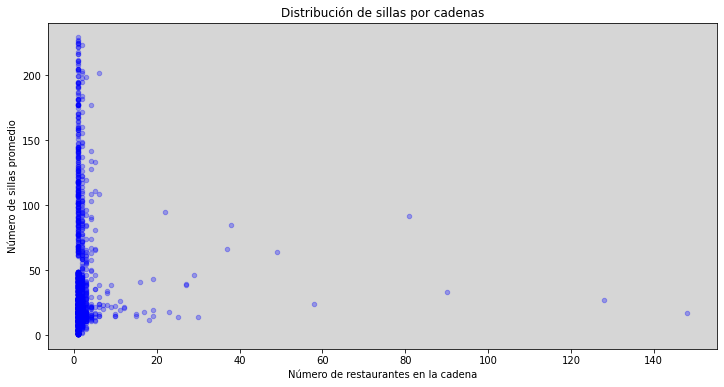

In [800]:
chains_pivot.plot(x='n_rest', y='n_chairs', kind='scatter', alpha=0.3, color="blue", figsize=(12,6))
plt.xlabel("Número de restaurantes en la cadena")
plt.ylabel("Número de sillas promedio")
plt.title("Distribución de sillas por cadenas")
plt.show()

Como se puede apreciar son casos muy excepcionales los que superan los 5 restaurantes. Sin embargo, podemos ver que las cadenas con más de 5 restaurantes en general no superan las 50 sillas. Hagamos zoom a nuestro gráfico:

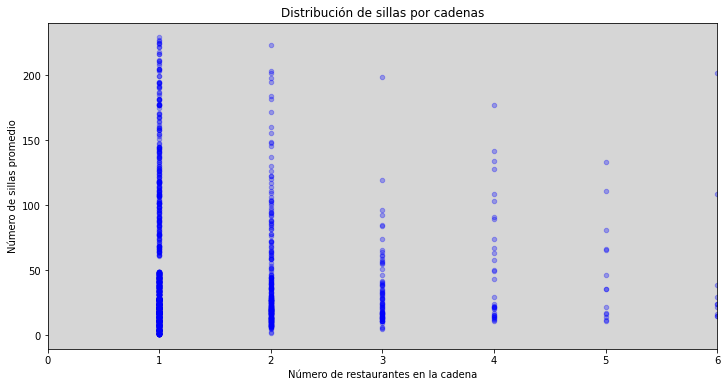

In [801]:
chains_pivot.plot(x='n_rest', y='n_chairs', kind='scatter', alpha=0.3, color="blue",xlim=(0, 6), figsize=(12,6))
plt.xlabel("Número de restaurantes en la cadena")
plt.ylabel("Número de sillas promedio")
plt.title("Distribución de sillas por cadenas")
plt.show()

La mayoría de las cadenas tiene entre 1 y 3 restaurantes y en general a mayor número de restaurantes, menor número de sillas.

Vamos a mostrar está distribución observando las cadenas que no superan los 15 restauranes:

In [802]:
chains_pivot_1_to_15 = chains_pivot.query('n_rest <= 15')

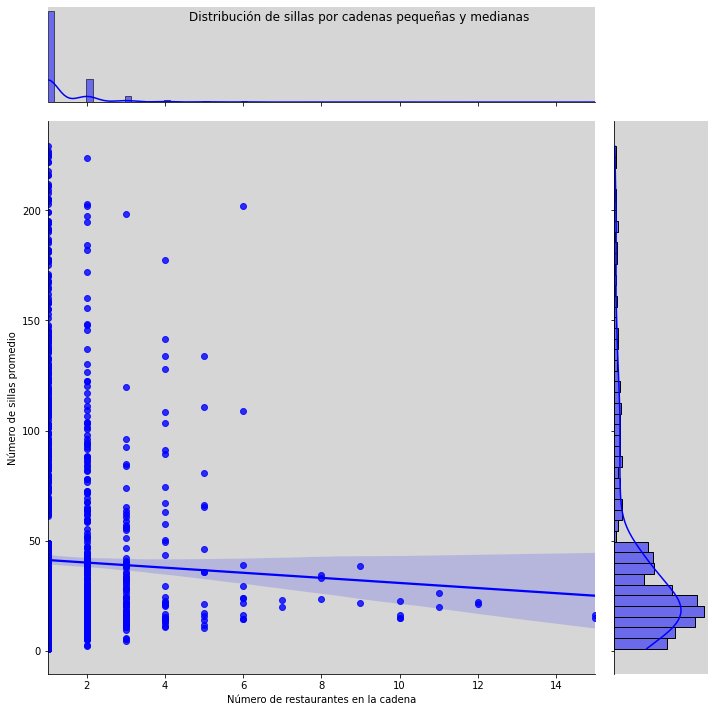

In [803]:
ax = sns.jointplot(x='n_rest', y='n_chairs', data=chains_pivot_1_to_15, kind='reg', height= 10, color='blue')
ax.fig.suptitle("Distribución de sillas por cadenas pequeñas y medianas")
ax.ax_joint.set_xlabel('Número de restaurantes en la cadena')
ax.ax_joint.set_ylabel('Número de sillas promedio')
plt.show()

In [804]:
chains_pivot_15_plus = chains_pivot.query('n_rest >= 15')

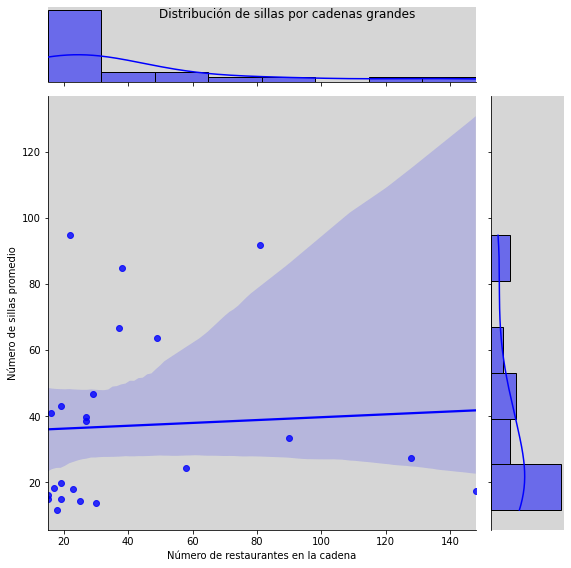

In [805]:
ax = sns.jointplot(x='n_rest', y='n_chairs', data=chains_pivot_15_plus, kind='reg', height= 8, color='blue')
ax.fig.suptitle("Distribución de sillas por cadenas grandes")
ax.ax_joint.set_xlabel('Número de restaurantes en la cadena')
ax.ax_joint.set_ylabel('Número de sillas promedio')
plt.show()

En conclusión podemos encontrar que las cadenas en general se caracterizan por tener pocos establecimientos, la gran mayoría no tiene más de 3 en el área. Además lo más normal es no tener más de 50 sillas por establecimiento. En las cadenas pequeñas de 1 a 3 locales en el área, notamos que por lo general no superan las 150 sillas. Por otro lado las cadenas con más de 20 locales tienden a tener menos de 40 sillas en promedio. 

Podemos concluir como regla general, que a mayor número de locales, menor número de sillas. 

### De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? <a id='more_seats'></a>

Si vemos la distribución del número de sillas por tipo de restaurante ya podemos notar ciertas tendencias:

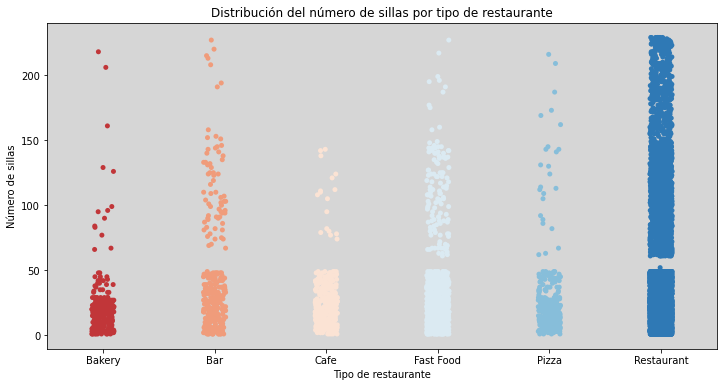

In [806]:
plt.figure(figsize=(12,6))
sns.stripplot(x='rest_type', y='n_chairs' , data=rest_data)
plt.xlabel("Tipo de restaurante")
plt.ylabel("Número de sillas")
plt.rcParams['axes.facecolor'] = '#d6d6d6'
plt.title("Distribución del número de sillas por tipo de restaurante")
plt.show()

Por ejemplo, los bares y panaderías tienden a tener menos sillas que los restaurantes. Pero veamos los promedios para tener una mejor idea:

In [826]:
rest_type_chairs = rest_data.groupby('rest_type').agg({'n_chairs':'mean'}).reset_index()
rest_type_chairs.sort_values(by='n_chairs', ascending=False)

,rest_type,n_chairs
5,Restaurant,48.114516
1,Bar,44.786942
3,Fast Food,31.777242
4,Pizza,27.951299
2,Cafe,25.002375
0,Bakery,21.839858


In [844]:
rest_type_chairs['n_chairs'].sum().round()

199.0

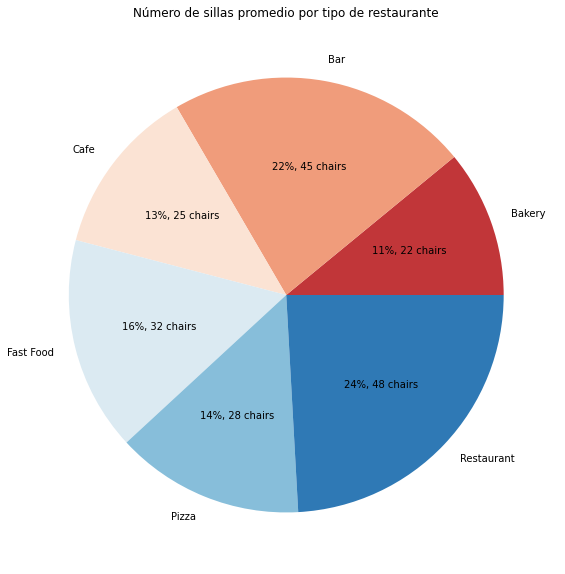

In [848]:
palette = sns.color_palette("RdBu", 6)
data = rest_type_chairs['n_chairs']
labels = rest_type_chairs['rest_type']
plt.figure(figsize=(16,10))
plt.title("Número de sillas promedio por tipo de restaurante")
plt.pie(data, labels = labels, colors = palette, autopct= lambda p:f'{p:.0f}%, {p*199/100 :.0f} chairs')
plt.show()

Como se puede apreciar, en promedio los restuarantes tiene del orden de 24 sillas, mientras que los bares 22, en el otro extremo las panaderías tienen del orden de 11 sillas y los café en general 13.

### Restaurantes por calle <a id='rest_streets'></a>

Lo primero que haremos es crear una nueva columna que contenga solo los nombres de las calles:

In [809]:
rest_data['new_rest_address'] = rest_data['rest_address'].replace('#', '')
rest_data['new_rest_address'] = rest_data['rest_address'].str.extract(r'([A-z ]+)')
rest_data['new_rest_address'] = rest_data['new_rest_address'].str.lower()
rest_data['new_rest_address'] = rest_data['new_rest_address'].str.replace(' n ', '')
rest_data['new_rest_address'] = rest_data['new_rest_address'].str.replace(' s ', '')
rest_data['new_rest_address'] = rest_data['new_rest_address'].str.replace(' e ', '')
rest_data['new_rest_address'] = rest_data['new_rest_address'].str.replace(' w ', '')
rest_data['new_rest_address'] = rest_data['new_rest_address'].replace(r'^\s*$', np.nan, regex=True)
rest_data['new_rest_address_2'] = rest_data['rest_address'].str.extract(r'(\dST ST|\dRD ST|\dTH ST)')
rest_data = rest_data.assign(**{
    'new_rest_address': rest_data['new_rest_address'].fillna(rest_data['new_rest_address_2'])})
rest_data = rest_data.drop('new_rest_address_2', axis=1)
rest_data.head(5)

,rest_id,rest_name,rest_address,chain,rest_type,n_chairs,new_rest_address
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26.0,eagle rock blvd
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9.0,world way
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20.0,hollywood blvd
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22.0,sunset blvd
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20.0,echo park ave


Ahora podemos hacer una tabla agrupando los restaurantes por calles:

In [810]:
rest_by_street = rest_data.groupby(by='new_rest_address').agg({'rest_name':'count','n_chairs':'mean'}).reset_index()
rest_by_street.columns = ['rest_address', 'n_rest', 'ave_chairs']
rest_by_street.sort_values(by='n_rest', ascending=False)

,rest_address,n_rest,ave_chairs
1049,sunset blvd,292,51.619863
970,pico blvd,289,40.536332
563,3RD ST,266,40.484962
566,6TH ST,231,40.626087
724,figueroa st,209,45.502392
...,...,...,...
474,vermont ave,1,16.000000
475,vermont ave n,1,2.000000
477,victoria ave,1,6.000000
479,vine,1,46.000000


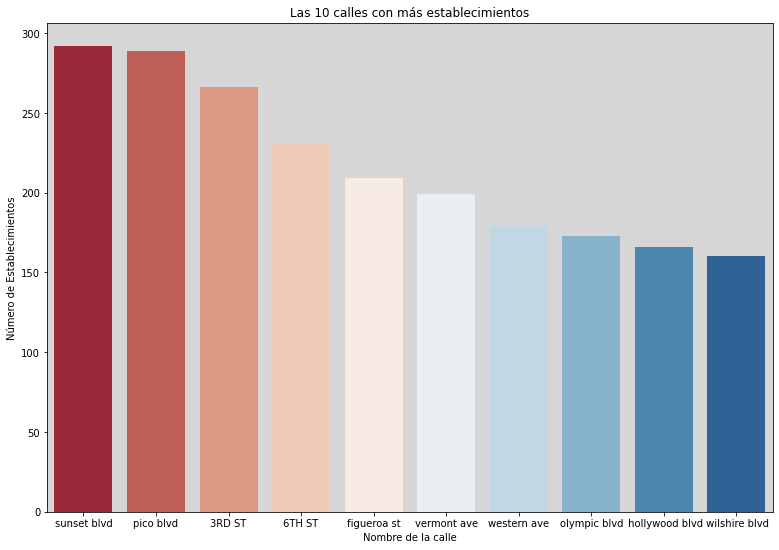

In [821]:
top_10_streets = rest_by_street.sort_values(by='n_rest', ascending=False).head(10)
plt.figure(figsize=(13,9))
palette = sns.color_palette("RdBu", 10)
sns.set_palette(palette)
ax = sns.barplot(x='rest_address', y='n_rest', data=top_10_streets)
plt.xlabel("Nombre de la calle")
plt.ylabel("Número de Establecimientos")
plt.title("Las 10 calles con más establecimientos")
plt.show()

Por otro lado, podemos ver que las calles con solo un establecimiento son:

In [824]:
one_rest_streets = rest_by_street.query('n_rest == 1')
print('Encontramos', one_rest_streets['n_rest'].sum(), 'calles que tienen solo un establecimiento.')

Encontramos 619 calles que tienen solo un establecimiento.


In [850]:
top_10_streets

,rest_address,n_rest,ave_chairs
1049,sunset blvd,292,51.619863
970,pico blvd,289,40.536332
563,3RD ST,266,40.484962
566,6TH ST,231,40.626087
724,figueroa st,209,45.502392
1077,vermont ave,199,48.075758
1118,western ave,179,43.446927
952,olympic blvd,173,55.838150
198,hollywood blvd,166,53.885542
516,wilshire blvd,160,62.250000


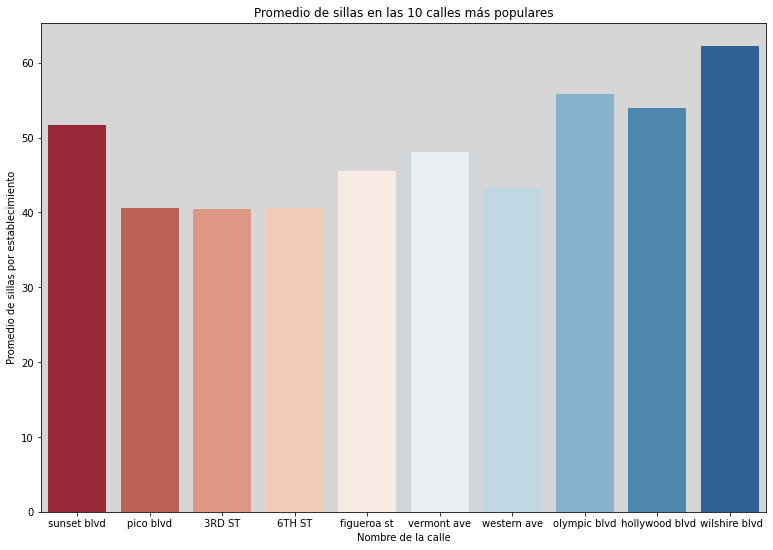

In [825]:
plt.figure(figsize=(13,9))
palette = sns.color_palette("RdBu", 10)
sns.set_palette(palette)
ax = sns.barplot(x='rest_address', y='ave_chairs', data=top_10_streets)
plt.xlabel("Nombre de la calle")
plt.ylabel("Promedio de sillas por establecimiento")
plt.title("Promedio de sillas en las 10 calles más populares")
plt.show()

## Conclusiones Generales <a id='conclusiones'></a>

Recibimos el archivo *rest_data_us.csv*. Este archivo consta de 6 columnas y 9651 líneas. Realizamos una ligera obtimización del mismo y se cambiaron los nombres de las columnas por unos más apropriados. Encontramos tres valores ausentes en la columna *chain* (verdadero o falso para definir si el establecimiento corresponde a una cadena o no), estos representan solo 0.03% de los datos totales así que se decidió dejarlos como estaban. No encotramos duplicados en la columna *rest_id* (columna con los id únicos de restaurantes). Cuando revisamos la columna *rest_address* (con las direcciónes particulares de los restaurantes), nos encontramos con 913 direcciones que generaban 1134 datos duplicados. La base de datos estaba llena de duplicados no obvios que debimos limpiar. Se revisaron línea a línea las dirrecciones que contenian más de un restaurante. Se analizó si era justificable que hubiesen varios restaurantes en aquella dirrección, por ejemplo si es un boulevar, un centro comercial, cacino o incluso campus universitario, tiene sentido que hayan varios restaurantes e incluso que se repitan por ejemplo cadenas de café. Por otro lado, se consideraron datos inciertos los restauranes que tenían casi el mismo nombre con ligeras variaciones en la misma calle, por ejemplo GET BBUL y GETBBUL RESTAURANT es muy probable que sean el mismo restaurante sobre todo porque la dirrección es bastante espécifica 3189 1/2 W OLYMPIC BLVD. Otro ejemplo, Pollos al carbon restaurant y Restaurant Pollo al carbón, los dos en 326 E PICO BLVD, lo más probable es que haya sido ingresado dos veces.

Con la base limpia, pudimos comenzar nuestro análisis y encontramos que la mayoría de los establecimientos en nuestra base de datos corresponden a restaurantes (7097), seguidos muy por debajo por los establecimientos de comida rápida (1038). El resto son números muy bajos, menos de 500 establecimientos. Encontramos además que el 62% de los establecimiontos en LA corresponden a locales independientes.

A primera vista, las cadenas siguen el mismo patrón que la base completa. La mayoría de las cadenas corresponden a restaurantes (2213), seguidos muy por debajo por las cadenas de comida rápida (588). El resto son números por debajo de los 300. Nos preguntamos entonces, ¿Qué caracteriza a las cadenas?

En nuestra base de datos notamos que las panaderías son todas cadenas (no encontramos ninguna independiente en nuestros datos). Los cafés y los locales de comida rápida tienden a ser cadenas, mientras que las pizerias se encuentran bastante parejas (son tanto cadenas como independientes). Los bares, en cambio, al menos en Los Ángeles tienden a ser locales independientes. En lo que a restaurantes compete, hay más restaurantes independientes que cadenas. 

Luego analizamos la cantidad de sillas para los distintos establecimientos de las cadenas. La media es de 40 sillas por establecimiento, sin embargo la desviación estándar es de 43 sillas, esto indica la diferencia entre el mínimo de sillas (1), el máximo de sillas (229) y la media que son 25. Logramos comprobar que los establecimientos en general no superan las 50 sillas, salvo casos excepcionales. También comprobamos que la mayoría de las cadenas tienen entre 1 y 3 establecimientos.  En las cadenas pequeñas de 1 a 3 locales en el área, notamos que por lo general no superan las 150 sillas. Por otro lado las cadenas con más de 20 locales tienden a tener menos de 40 sillas en promedio. Encontramos como regla general que a mayor número de establecimientos, menor número de sillas.

Revisamos entonces el número de sillas por establecimiento y encontramos que en promedio los restaurantes tiene del orden de 24 sillas, mientras que los bares 22, en el otro extremo las panaderías tienen del orden de 11 sillas y los café en general 13.


Finalmente, encontramos las calles con más establecimientos. Estas son Sunset Blvd, Pico Blvd y 3rd Street (250 +).
Luego tenemos 6th Street, Figueroa Street y Vernont Avenue con más de 200 establecimientos.
Las últimas 4 calles tienen sobre los 150 establecimientos y son Western Avenue, Olympic Boulevard, Hollywood Boulevard y Wilshire Boulevard. En el otro extremo encontramos 169 calles que tienen solo un establecimiento.

Para concluir nuestro reporte, revisamos los promedios de sillas para las calles más populares. Sunset Blvd tiene en promedio 52 sillas por establecimiento. Pico Blvd, 3rd Street y 6th Street tienen en promedio 40 sillas. Figueroa Street y Vernont Avenue ambas tienen del orden de 45 a 48 sillas en promedio. Western Avenue promedia 43 sillas. Olympic Boulevard (55), Hollywood Boulevard (53) y Wilshire Boulevard (62).

Con nuestro estudio entonces, recomendamos: 
- Abrir restaurantes, estos son claramente los líderes del mercado en L.A. 
- No debería haber más de 3 locales en el área. 
- Cada local debería tener un promedio de 40 sillas.
- Idealmente, deberían estar en Sunset Boulevard, Pico Boulevard y 3rd Street que son las áreas que atraen a la mayor cantidad de público.

## Presentación <a id='presentation'></a>

Presentation: <https://github.com/emalbran/Practicum-Data-Analyst/blob/93d3708084fa9ff30666704105649434ddde20cb/market_study/Estudio%20de%20Mercado.pdf>